<a href="https://colab.research.google.com/github/hirdeshkumar2407/NLP_Group_Assigment/blob/feature-cluster-the-docs/1_ClusterTheDocuments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cluster The Documents**

# 1.Data Loading and Basic Inspection

In [1]:
from google.colab import userdata


In [2]:
import pandas as pd

df = pd.read_json("hf://datasets/FreedomIntelligence/RAG-Instruct/rag_instruct.json")

In [3]:
print(f"Total entries: {len(df)}")

Total entries: 40541


Total 40541 documents loaded in dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40541 entries, 0 to 40540
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   question   40541 non-null  object
 1   answer     40541 non-null  object
 2   documents  40541 non-null  object
dtypes: object(3)
memory usage: 950.3+ KB


In [5]:
df.head(5)

,question,answer,documents
0,Describe the cultural impact and legacy of the...,The 1967 Disney film 'The Jungle Book' has had...,[decided to make the story more straightforwar...
1,Comparing Taiwanese and Chinese education syst...,Taiwanese students performed exceptionally wel...,[the world with 68.5% of Taiwanese high school...
2,What are some key features and applications of...,PyTorch is an open-source machine learning lib...,[Sparrho Sparrho combines human and artificial...
3,What term describes the post-war condition of ...,The term used to describe the state of Germany...,[zones received 1200 kilocalories a day in off...
4,Compare the nutritional value and potential al...,Kiwifruit is known for its vibrant green or go...,"[(oha), ahahara vegetable and many others keep..."


# 2.Length and Vocabulary Analysis


--- 1. Investigating 'documents' column structure ---

Data types found in 'documents' column:
documents
<class 'list'>    40541
Name: count, dtype: int64

First 5 raw entries of 'documents' column:
[['decided to make the story more straightforward, as the novel is very episodic, with Mowgli going back and forth from the jungle to the Man-Village, and Peet felt that Mowgli returning to the Man-Village should be the ending for the film. Following suggestions, Peet also created two original characters: The human girl for which Mowgli falls in love, as the animators considered that falling in love would be the best excuse for Mowgli to leave the jungle; and Louie, king of the monkeys. Louie was a less comical character, enslaving Mowgli trying to get the boy to teach him to', 'and settings. In 2016, a Baloo figure was released for the console and later on mobile versions of "Disney Infinity 3.0" (2015), which required a downloadable content update to use. Although the figure was released

,question_length_tokens,answer_length_tokens,documents_length_tokens
count,40541.000000,40541.000000,40541.0
mean,20.988875,91.173528,1000.0
std,11.598130,50.810384,0.0
min,3.000000,1.000000,1000.0
25%,14.000000,57.000000,1000.0
50%,18.000000,84.000000,1000.0
75%,24.000000,115.000000,1000.0
max,147.000000,598.000000,1000.0



--- 4. Plotting Updated Length Distributions ---


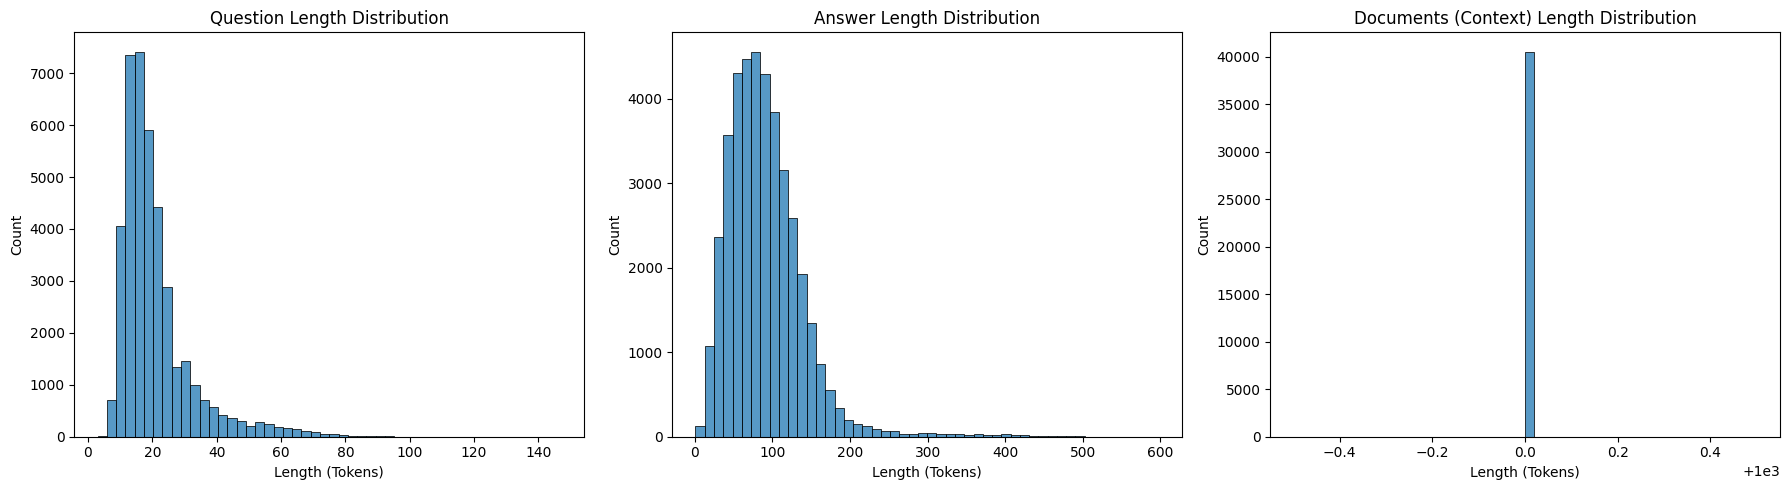

In [ ]:
# --- Updated Length Analysis ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume 'df' is your DataFrame loaded previously
# df = pd.read_json("hf://datasets/FreedomIntelligence/RAG-Instruct/rag_instruct.json")

print("\n--- 1. Investigating 'documents' column structure ---")

# Check data types within the column
print("\nData types found in 'documents' column:")
print(df['documents'].apply(type).value_counts())

# Look at the first few raw entries
print("\nFirst 5 raw entries of 'documents' column:")
try:
    # Use .tolist() for a clearer view of potential lists/dicts
    print(df['documents'].head().tolist())
except Exception as e:
    print(f"(Could not display as list, showing standard head): {e}")
    display(df['documents'].head())

# --- 2. Define a Robust Length Calculation Function ---
print("\n--- 2. Calculating Lengths with Robust Tokenizer ---")

def calculate_token_length(data_entry):
    """
    Calculates token length for different potential data structures.
    Uses simple space splitting for tokenization.
    """
    text_to_tokenize = ""
    if isinstance(data_entry, str):
        # It's a simple string
        text_to_tokenize = data_entry
    elif isinstance(data_entry, list):
        # It's a list, assume list of strings and join them
        text_to_tokenize = ' '.join(str(item) for item in data_entry if isinstance(item, str))
    # Add elif conditions here if you find other types like dicts
    # elif isinstance(data_entry, dict):
    #     # Example: extract text from a specific key
    #     text_to_tokenize = data_entry.get('text_field_key', '')

    # Tokenize the resulting text (simple space split, lowercase)
    if text_to_tokenize:
        tokens = text_to_tokenize.lower().split()
        return len(tokens)
    else:
        # Return 0 if no text could be extracted or entry was None/invalid
        return 0

# Apply the robust function to calculate lengths
for col in ['question', 'answer', 'documents']:
    col_length_name = f'{col}_length_tokens'
    print(f"Calculating length for column: {col}")
    df[col_length_name] = df[col].apply(calculate_token_length)

# --- 3. Display Updated Statistics ---
print("\n--- 3. Updated Descriptive Statistics for Token Lengths ---")
length_columns = [f'{col}_length_tokens' for col in ['question', 'answer', 'documents']]
# Check if calculation produced results before describing
if all(col in df.columns for col in length_columns):
     display(df[length_columns].describe())
else:
     print("Length calculation failed for some columns.")


# --- 4. Plot Updated Distributions ---
print("\n--- 4. Plotting Updated Length Distributions ---")
plt.figure(figsize=(18, 5))

# Check if length column exists before plotting
if 'question_length_tokens' in df.columns:
    plt.subplot(1, 3, 1)
    sns.histplot(df['question_length_tokens'], bins=50, kde=False)
    plt.title('Question Length Distribution')
    plt.xlabel("Length (Tokens)")
else:
     print("Skipping plot for question length.")

if 'answer_length_tokens' in df.columns:
    plt.subplot(1, 3, 2)
    sns.histplot(df['answer_length_tokens'], bins=50, kde=False)
    plt.title('Answer Length Distribution')
    plt.xlabel("Length (Tokens)")
else:
     print("Skipping plot for answer length.")

if 'documents_length_tokens' in df.columns:
    plt.subplot(1, 3, 3)
    # Use a log scale for y-axis if counts are very high for some bins, but check data first
    # Check if max length > 0 before plotting
    if df['documents_length_tokens'].max() > 0:
        sns.histplot(df['documents_length_tokens'], bins=50, kde=False)
        plt.title('Documents (Context) Length Distribution')
        plt.xlabel("Length (Tokens)")
        # Optional: Apply log scale if distribution is heavily skewed
        # plt.yscale('log')
        # plt.title('Documents (Context) Length Distribution (Log Scale Y-axis)')
    else:
        plt.text(0.5, 0.5, 'No valid lengths > 0 found for documents',
                 horizontalalignment='center', verticalalignment='center',
                 transform=plt.gca().transAxes)
        plt.title('Documents (Context) Length Distribution')
        plt.xlabel("Length (Tokens)")

else:
     print("Skipping plot for documents length.")


plt.tight_layout()
plt.show()

# --- 5. Interpretation (Add Markdown Cell Here) ---
# Based on the UPDATED statistics and plots:
# - Describe the typical length and spread for questions, answers, and NOW documents.
# - Did the investigation reveal the structure of the 'documents' column?
# - Does the document length distribution look reasonable now? Is it skewed?
# - Mention any implications for later processing (e.g., maximum sequence lengths for models).

In [6]:
import nltk
print("--- NLTK Resource Check ---")
# --- Download 'punkt' if needed ---
try:
    nltk.data.find('tokenizers/punkt')
    print("NLTK 'punkt' resource found.")
except LookupError:
    print("NLTK 'punkt' not found. Downloading...")
    try:
        nltk.download('punkt', quiet=True)
        print("NLTK 'punkt' downloaded successfully.")
    except Exception as download_error:
        print(f"ERROR: Failed to download NLTK 'punkt': {download_error}")

# --- Download 'punkt_tab' if needed ---
try:
    # Note: 'punkt_tab' might not be directly findable this way,
    # but word_tokenize might load it internally. We attempt download if tokenization fails below.
    # Let's proactively try downloading it based on the error.
    print("Attempting proactive download of NLTK 'punkt_tab'...")
    nltk.download('punkt_tab', quiet=True)
    print("NLTK 'punkt_tab' download attempted (check output for errors).")
except Exception as download_error:
     print(f"ERROR: Failed to download NLTK 'punkt_tab': {download_error}")


# --- NLTK Sanity Check ---
print("\n--- Running NLTK Sanity Check ---")
try:
    test_string = "This is a simple test."
    tokens = nltk.word_tokenize(test_string) # This line triggered the error before
    print(f"  Input: '{test_string}'")
    print(f"  Tokens: {tokens}")
    print(f"  Length: {len(tokens)}")
    if len(tokens) > 0:
        print("  --> NLTK tokenization seems OK.")
    else:
        print("  --> NLTK tokenization FAILED on simple string!")
except LookupError as le:
    # Catch LookupError specifically, as it might indicate other missing resources
    print(f"  --> NLTK tokenization CRASHED (LookupError): {le}")
    print("      Another NLTK resource might be missing. Try downloading it.")
except Exception as e:
    print(f"  --> NLTK tokenization CRASHED (Other Error): {e}")

--- NLTK Resource Check ---
NLTK 'punkt' not found. Downloading...
NLTK 'punkt' downloaded successfully.
Attempting proactive download of NLTK 'punkt_tab'...
NLTK 'punkt_tab' download attempted (check output for errors).

--- Running NLTK Sanity Check ---
  Input: 'This is a simple test.'
  Tokens: ['This', 'is', 'a', 'simple', 'test', '.']
  Length: 6
  --> NLTK tokenization seems OK.


In [7]:
import pandas as pd
import nltk
# Assume 'df' is loaded

print("\n--- Manual Inspection and Processing of First 3 Rows (NLTK OK) ---")

# Columns to inspect
columns_to_inspect = ['question', 'answer', 'documents']

for idx in range(min(3, len(df))): # Look at first 3 rows
    print(f"\n=== Row Index: {idx} ===")
    for col in columns_to_inspect:
        print(f"\n  --- Column: '{col}' ---")
        original_value = df.loc[idx, col]
        value_type = type(original_value)
        value_repr = repr(original_value)
        # Limit printing potentially huge strings in repr
        value_repr_short = (value_repr[:200] + '...') if len(value_repr) > 200 else value_repr

        print(f"    Original Value Type: {value_type}")
        print(f"    Original Value Repr: {value_repr_short}")

        # --- Step A: Force to String and Strip ---
        try:
            stripped_value = str(original_value).strip()
            stripped_repr = repr(stripped_value)
            stripped_repr_short = (stripped_repr[:200] + '...') if len(stripped_repr) > 200 else stripped_repr
            print(f"    Stripped Value Repr: {stripped_repr_short}")
            print(f"    Is Stripped Value Empty?: {not bool(stripped_value)}")
        except Exception as e:
            print(f"    ERROR during str() or strip(): {e}")
            stripped_value = None # Mark as failed

        # --- Step B: Attempt NLTK Tokenization ---
        if stripped_value is not None and stripped_value: # Only tokenize if stripping worked and result is not empty
            print(f"    Attempting NLTK Tokenization on stripped value...")
            try:
                tokens = nltk.word_tokenize(stripped_value)
                print(f"      NLTK Tokens: {tokens[:15]} {'...' if len(tokens)>15 else ''}") # Show first few tokens
                print(f"      NLTK Token Count: {len(tokens)}")
            except Exception as e:
                print(f"      ERROR during nltk.word_tokenize(): {e}")
                tokens = [] # Mark as failed
                print(f"      NLTK Token Count: 0")
        elif stripped_value is not None and not stripped_value:
             print(f"    Skipping NLTK Tokenization because stripped value is empty.")
             print(f"      NLTK Token Count: 0")
        else:
             print(f"    Skipping NLTK Tokenization because stripping failed.")
             print(f"      NLTK Token Count: 0")


--- Manual Inspection and Processing of First 3 Rows (NLTK OK) ---

=== Row Index: 0 ===

  --- Column: 'question' ---
    Original Value Type: <class 'str'>
    Original Value Repr: "Describe the cultural impact and legacy of the 1967 Disney film 'The Jungle Book' on animation and popular culture."
    Stripped Value Repr: "Describe the cultural impact and legacy of the 1967 Disney film 'The Jungle Book' on animation and popular culture."
    Is Stripped Value Empty?: False
    Attempting NLTK Tokenization on stripped value...
      NLTK Tokens: ['Describe', 'the', 'cultural', 'impact', 'and', 'legacy', 'of', 'the', '1967', 'Disney', 'film', "'The", 'Jungle', 'Book', "'"] ...
      NLTK Token Count: 21

  --- Column: 'answer' ---
    Original Value Type: <class 'str'>
    Original Value Repr: "The 1967 Disney film 'The Jungle Book' has had a profound impact on animation and popular culture. It was the last animated film produced by Walt Disney himself, marking an end to an era of his

**Do random sampling of 10% of the dataset**

NLTK 'punkt' resource found.
NLTK 'punkt_tab' download attempted.
--- Loading Full Dataset ---
Full dataset shape: (40541, 3)

--- Sampling the Dataset ---
Sampled dataset shape: (4054, 3)

--- Running Analysis on the SAMPLE ---

--- Running Length Analysis on Sample ---

Final Descriptive Statistics for Token Lengths (Sample):


,question_length_final,answer_length_final,documents_length_final
count,4054.000000,4054.000000,4054.000000
mean,23.282437,104.570794,1166.352738
std,13.247102,63.033743,46.004274
min,6.000000,1.000000,1084.000000
25%,15.000000,64.000000,1136.000000
50%,19.000000,95.000000,1156.000000
75%,26.000000,132.000000,1185.000000
max,113.000000,638.000000,1494.000000



Plotting Final Length Distributions (Sample):


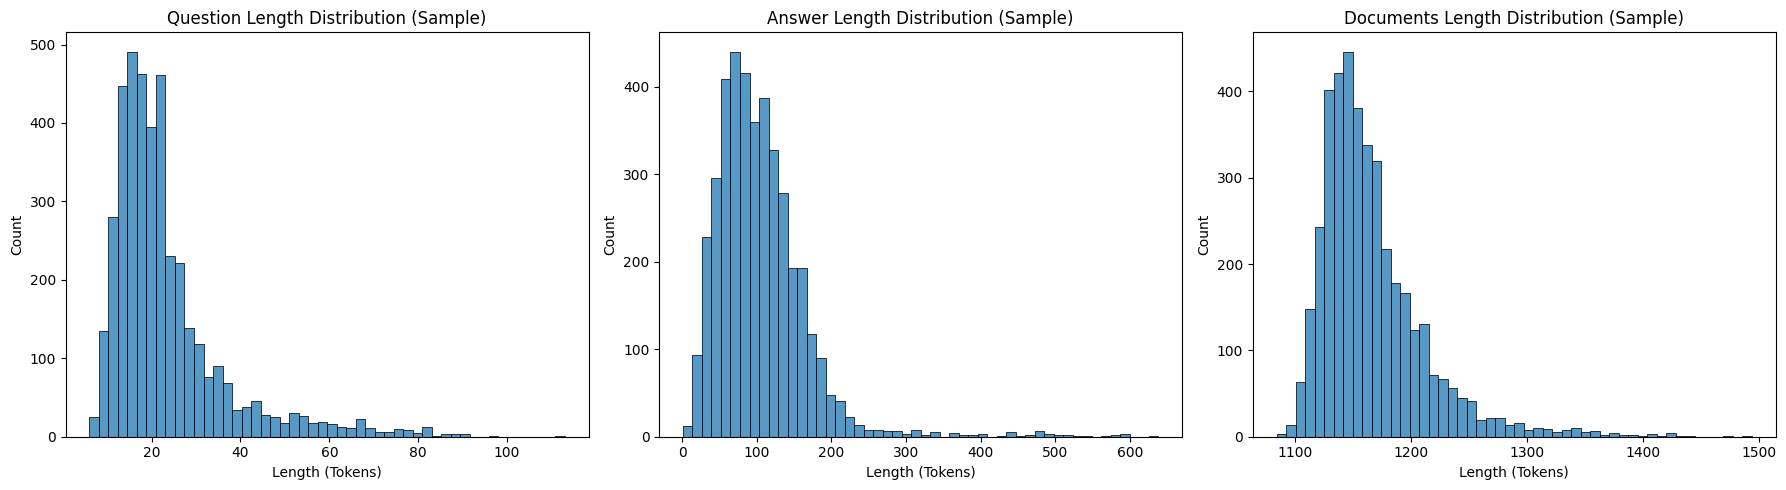


--- Running Vocabulary Analysis on Sample (Focusing on Documents) ---
Tokenizing all documents in sample for collection vocabulary...

Total Collection Vocabulary Size (Sample - Unique Tokens in Documents): 184890

Calculating vocabulary size per document entry in sample...
Average Vocabulary Size per Document Entry (Sample - Context): 491.16
Standard Deviation of Vocabulary Size per Document Entry (Sample): 45.32


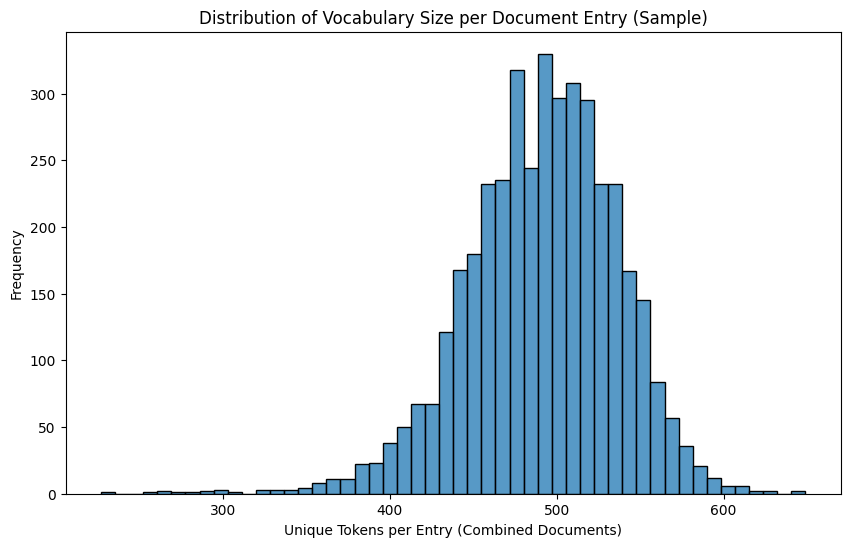

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import nltk # Make sure NLTK and 'punkt' are available

# --- NLTK Resource Check (Run once) ---
try:
    nltk.data.find('tokenizers/punkt')
    print("NLTK 'punkt' resource found.")
except LookupError:
    print("NLTK 'punkt' not found. Downloading...")
    try:
        nltk.download('punkt', quiet=True)
        print("NLTK 'punkt' downloaded successfully.")
    except Exception as download_error:
        print(f"ERROR: Failed to download NLTK 'punkt': {download_error}")
# Add punkt_tab download if needed based on previous errors
try:
    nltk.download('punkt_tab', quiet=True, raise_on_error=False) # Attempt download
    print("NLTK 'punkt_tab' download attempted.")
except Exception as e:
     print(f"Could not attempt punkt_tab download: {e}")
# -------------------------------------


# --- 1. Load Full Dataset ---
print("--- Loading Full Dataset ---")
# Assume df is already loaded from your previous steps
# df = pd.read_json("hf://datasets/FreedomIntelligence/RAG-Instruct/rag_instruct.json")
print(f"Full dataset shape: {df.shape}")

# --- 2. Sample the Dataset ---
# --- Choose your sample size ---
# Option A: Fraction (e.g., 10%)
sample_fraction = 0.10 # Adjust as needed (0.1 = 10%, 0.2 = 20%)
# Option B: Fixed number (e.g., 5000 rows)
# sample_size = 5000 # Uncomment and adjust if you prefer a fixed size

print(f"\n--- Sampling the Dataset ---")
try:
    # Use fraction
    df_sample = df.sample(frac=sample_fraction, random_state=42) # Use random_state for reproducibility
    # Or use fixed size (uncomment ONE of these)
    # df_sample = df.sample(n=sample_size, random_state=42)
    print(f"Sampled dataset shape: {df_sample.shape}")
except ValueError as e:
     print(f"Error during sampling (maybe sample size > dataset size?): {e}")
     print("Using full dataset instead.")
     df_sample = df # Fallback to full df if sampling fails


# --- 3. Define CORRECTED Processing Functions (from previous step) ---
# (These functions operate on single rows, so they don't need changing)
def calculate_token_length_list_robust(data_entry):
    """Calculates token length assuming input is a list of strings."""
    total_tokens = 0
    if isinstance(data_entry, list):
        for item in data_entry:
            if isinstance(item, str):
                text = item.strip() # Strip individual strings
                if text:
                    try:
                        tokens = nltk.word_tokenize(text)
                        total_tokens += len(tokens)
                    except Exception:
                        pass # Ignore tokenization errors on individual strings
        return total_tokens
    elif isinstance(data_entry, str): # Handle cases where it might be just a string
         text = data_entry.strip()
         if text:
             try:
                 return len(nltk.word_tokenize(text))
             except Exception:
                 return 0
    return 0

def extract_and_tokenize_list_robust(data_entry):
    """Extracts and tokenizes text assuming input is a list of strings."""
    all_tokens = []
    if isinstance(data_entry, list):
        for item in data_entry:
            if isinstance(item, str):
                text = item.strip()
                if text:
                    try:
                        tokens = nltk.word_tokenize(text)
                        all_tokens.extend(tokens)
                    except Exception:
                        pass # Ignore tokenization errors
    elif isinstance(data_entry, str): # Handle cases where it might be just a string
        text = data_entry.strip()
        if text:
             try:
                 return nltk.word_tokenize(text)
             except Exception:
                 return []
    return all_tokens

# --- 4. Run Analysis on the SAMPLE ---
print("\n--- Running Analysis on the SAMPLE ---")

# --- 4a. Length Analysis on SAMPLE ---
print("\n--- Running Length Analysis on Sample ---")
# Apply functions to the sampled DataFrame
df_sample = df_sample.copy() # Avoid SettingWithCopyWarning
df_sample['question_length_final'] = df_sample['question'].apply(calculate_token_length_list_robust)
df_sample['answer_length_final'] = df_sample['answer'].apply(calculate_token_length_list_robust)
df_sample['documents_length_final'] = df_sample['documents'].apply(calculate_token_length_list_robust)

# Display length statistics for the SAMPLE
length_columns_final = ['question_length_final', 'answer_length_final', 'documents_length_final']
print("\nFinal Descriptive Statistics for Token Lengths (Sample):")
display(df_sample[length_columns_final].describe())

# Plot distributions for the SAMPLE
print("\nPlotting Final Length Distributions (Sample):")
plt.figure(figsize=(18, 5))
# (Plotting code is the same, just uses df_sample)
plt.subplot(1, 3, 1)
sns.histplot(df_sample['question_length_final'], bins=50, kde=False)
plt.title('Question Length Distribution (Sample)')
plt.xlabel("Length (Tokens)")
# ... (rest of plotting code for answer and documents, using df_sample) ...
plt.subplot(1, 3, 2)
sns.histplot(df_sample['answer_length_final'], bins=50, kde=False)
plt.title('Answer Length Distribution (Sample)')
plt.xlabel("Length (Tokens)")

plt.subplot(1, 3, 3)
if 'documents_length_final' in df_sample.columns and df_sample['documents_length_final'].max() > 0:
    sns.histplot(df_sample['documents_length_final'], bins=50, kde=False)
    plt.title('Documents Length Distribution (Sample)')
    plt.xlabel("Length (Tokens)")
else:
    plt.text(0.5, 0.5, 'Calculation Failed for Documents (Sample)',
             horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, color='red')
    plt.title('Documents Length Distribution (Sample)')
    plt.xlabel("Length (Tokens)")

plt.tight_layout()
plt.show()


# --- 4b. Vocabulary Analysis on SAMPLE ---
print("\n--- Running Vocabulary Analysis on Sample (Focusing on Documents) ---")
# --- Collection Vocabulary (SAMPLE) ---
print("Tokenizing all documents in sample for collection vocabulary...")
all_document_tokens_sample = []
# Iterate over the documents column in the SAMPLE DataFrame
for doc_list in df_sample['documents']:
     all_document_tokens_sample.extend(extract_and_tokenize_list_robust(doc_list))

collection_vocab_sample = set(all_document_tokens_sample)
collection_vocab_size_sample = len(collection_vocab_sample)
print(f"\nTotal Collection Vocabulary Size (Sample - Unique Tokens in Documents): {collection_vocab_size_sample}")


# --- Average Vocabulary Size per Document Entry (SAMPLE) ---
print("\nCalculating vocabulary size per document entry in sample...")
doc_vocab_sizes_sample = []
# Iterate over the documents column in the SAMPLE DataFrame
for doc_list in df_sample['documents']:
    doc_tokens = extract_and_tokenize_list_robust(doc_list)
    doc_vocab_sizes_sample.append(len(set(doc_tokens)))

avg_doc_vocab_sample = np.mean(doc_vocab_sizes_sample) if doc_vocab_sizes_sample else 0
std_doc_vocab_sample = np.std(doc_vocab_sizes_sample) if doc_vocab_sizes_sample else 0
print(f"Average Vocabulary Size per Document Entry (Sample - Context): {avg_doc_vocab_sample:.2f}")
print(f"Standard Deviation of Vocabulary Size per Document Entry (Sample): {std_doc_vocab_sample:.2f}")

# --- Plot Distribution (SAMPLE) ---
plt.figure(figsize=(10, 6))
sns.histplot(doc_vocab_sizes_sample, bins=50, kde=False)
plt.title('Distribution of Vocabulary Size per Document Entry (Sample)')
plt.xlabel('Unique Tokens per Entry (Combined Documents)')
plt.ylabel('Frequency')
plt.show()

# --- 5. Interpretation ---
# Add your Markdown interpretation here based on the SAMPLE results.
# Remember to mention that these results are based on a sample (e.g., 10%) of the data.

** Summary **

Data Structure: The documents column contains lists of strings. The question and answer columns contain strings.

**Lengths:**

1.   Questions are relatively short (mean 23 tokens).
2.   Answers are moderately long (mean 105 tokens).
3.   The provided context documents are consistently very long (mean 1166 tokens), significantly longer than questions/answers. The minimum context length observed in the sample is over 1000 tokens.
Vocabulary (Documents): The context documents utilize a large and diverse vocabulary (over 184k unique tokens in the 10% sample alone), suggesting they cover a wide range of topics or use complex languageList item


**Advice:**
The long context length (~1166 tokens) is important for model selection. Many standard transformer models have default maximum input lengths of 512 or 1024 tokens. You will likely need to:
Use models designed for longer contexts (e.g., Longformer, BigBird).
Implement strategies to truncate or summarize the context documents before feeding them to a standard model.
Consider RAG strategies that might retrieve smaller, more relevant chunks instead of using the entire provided document list unprocessed (though this dataset seems designed with the long context provided).

#3.Clustering

In [9]:
# Imports for clustering analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD # Good for sparse matrices like TF-IDF

# Assume df_sample is already loaded and available from previous steps
print(f"Using df_sample with shape: {df_sample.shape}")


Using df_sample with shape: (4054, 6)


 TF-IDF vectorization where you want one vector per row representing the text associated with that row, and the text happens to be stored as a list of strings within that row, you need to combine those strings first.

In [10]:
# Define the function to combine list of strings into one string
def combine_document_texts(data_entry):
    """Joins strings from a list into a single string."""
    if isinstance(data_entry, list):
        # Join valid strings with a space
        return ' '.join(str(item).strip() for item in data_entry if isinstance(item, str) and str(item).strip())
    elif isinstance(data_entry, str):
        return data_entry.strip() # Handle if it's already a string
    return "" # Return empty string for other types

# Apply this function to the 'documents' column in our sample
print("Creating 'combined_documents' column...")
# Ensure we're not modifying a slice directly if needed (depends on how df_sample was created)
# df_sample = df_sample.copy()
df_sample['combined_documents'] = df_sample['documents'].apply(combine_document_texts)

# Verify: check for empty strings and view the first couple of rows
num_empty = (df_sample['combined_documents'] == '').sum()
print(f"Number of rows with empty combined documents: {num_empty}")
if num_empty > 0:
    print("Warning: Some rows resulted in empty combined documents. Check the original data or function.")

print("\nHead of relevant columns after combining text:")
# Displaying full combined text might be too much, show limited width
pd.set_option('display.max_colwidth', 100) # Limit display width
display(df_sample[['documents', 'combined_documents']].head(3))
pd.reset_option('display.max_colwidth') # Reset display width

Creating 'combined_documents' column...
Number of rows with empty combined documents: 0

Head of relevant columns after combining text:


,documents,combined_documents
34345,[its natural environment. Although cultural tourism provides opportunities for understanding and...,its natural environment. Although cultural tourism provides opportunities for understanding and ...
30356,[Private Communications Technology Private Communications Technology (PCT) 1.0 was a protocol de...,Private Communications Technology Private Communications Technology (PCT) 1.0 was a protocol dev...
1640,[housed in the former home and studio of artist Nicolai Fechin. Taos art colony The Taos art col...,housed in the former home and studio of artist Nicolai Fechin. Taos art colony The Taos art colo...


Vectorization (TF-IDF)

Instead of limiting by the absolute number of features (max_features), using min_df and max_df controls the vocabulary based on document frequency:
min_df=5: Ignores words that appear in fewer than 5 documents in your sample (df_sample). This helps remove very rare words or potential typos.
max_df=0.8: Ignores words that appear in more than 80% of the documents in your sample. These words are often too common within this specific corpus to be discriminative (acting like corpus-specific stop words).
stop_words='english': Removes common English stop words (like "the", "a", "is", "in").

In [11]:
# Cell 4: Vectorization (TF-IDF) - Using min_df and max_df

# Vectorize the combined document text using TF-IDF

# --- User-defined vectorizer initialization ---
vectorizer = TfidfVectorizer(max_df=0.8, min_df=5, stop_words='english')
print(f"Initializing TF-IDF Vectorizer with min_df={vectorizer.min_df}, max_df={vectorizer.max_df}...")
# ---------------------------------------------

# Handle potential NaN values before fitting (though previous step should minimize this)
if df_sample['combined_documents'].isnull().any():
    print("Warning: Filling NaN in 'combined_documents' with empty string.")
    df_sample['combined_documents'].fillna('', inplace=True)

print("Fitting TF-IDF vectorizer and transforming data...")
try:
    tfidf_matrix = vectorizer.fit_transform(df_sample['combined_documents'])
    print(f"TF-IDF matrix created successfully.")
    # The number of features will now be determined by min/max_df, not fixed
    print(f"Shape of TF-IDF matrix: {tfidf_matrix.shape} (rows, features)")
except Exception as e:
    print(f"Error during TF-IDF vectorization: {e}")
    # Handle error - maybe stop execution or assign None to tfidf_matrix
    tfidf_matrix = None



Initializing TF-IDF Vectorizer with min_df=5, max_df=0.8...
Fitting TF-IDF vectorizer and transforming data...
TF-IDF matrix created successfully.
Shape of TF-IDF matrix: (4054, 27692) (rows, features)


 Look at some features (words) learned by the vectorizer

In [12]:
import random

# Check if the vectorizer object exists and has been fitted
if 'vectorizer' in locals() and hasattr(vectorizer, 'vocabulary_'):
    try:
        # Get the learned vocabulary (feature names) as a numpy array
        feature_names = vectorizer.get_feature_names_out()

        # Convert numpy array to a list for random.sample
        feature_list = list(feature_names)

        print(f"Total features learned: {len(feature_list)}")

        # Define how many random terms to view
        num_random_terms = 100

        # Ensure we don't try to sample more terms than exist
        if len(feature_list) >= num_random_terms:
            # Get a random sample
            random_sample = random.sample(feature_list, num_random_terms)

            # Sort the sample alphabetically (as in your example)
            sorted_sample = sorted(random_sample)

            print(f"\nRandom sample of {num_random_terms} vocabulary terms (sorted):")
            # Print the sample (adjust display if needed, e.g., wrap lines)
            # Consider using pprint for potentially nicer formatting
            from pprint import pprint
            pprint(sorted_sample, compact=True, width=100) # compact=True tries to fit more on a line

        else:
            print(f"\nVocabulary size ({len(feature_list)}) is smaller than requested sample size ({num_random_terms}).")
            print("Showing all terms (sorted):")
            pprint(sorted(feature_list), compact=True, width=100)

    except Exception as e:
        print(f"An error occurred while getting/sampling feature names: {e}")
else:
    print("Vectorizer object 'vectorizer' not found or not fitted. Please run Cell 4 first.")

Total features learned: 27692

Random sample of 100 vocabulary terms (sorted):
['2020', '697', '70s', 'able', 'abrasion', 'acm', 'administers', 'affecting', 'aggregating',
 'alphabetic', 'anybody', 'arte', 'bae', 'ballroom', 'battalion', 'bedding', 'belong', 'bets',
 'binds', 'biomes', 'breaker', 'canals', 'cantonese', 'carpets', 'cheapest', 'clyde',
 'commemorates', 'composited', 'comprehensions', 'concert', 'congregational', 'converge',
 'crystalline', 'cyanide', 'deacons', 'defence', 'desired', 'discriminative', 'ecology', 'erase',
 'expiration', 'explosive', 'failed', 'filenames', 'finely', 'floors', 'floristic', 'grand',
 'gregorian', 'guys', 'halo', 'hearts', 'hindering', 'homage', 'hostname', 'inferring',
 'insertions', 'investigate', 'jacobi', 'just', 'laurent', 'legislature', 'leonardo', 'longest',
 'mahatma', 'mammary', 'miniaturized', 'mixture', 'neutrinos', 'obsessed', 'owen', 'peters',
 'placed', 'poetry', 'polystyrene', 'prokaryotic', 'pronouns', 'provincial', 'quay',
 'q

Prerequisites and Get Vocabulary

In [13]:
import numpy as np

# --- Prerequisites Check ---
if 'vectorizer' not in locals() or not hasattr(vectorizer, 'vocabulary_'):
    print("Error: 'vectorizer' not found or not fitted. Please run Cell 4 first.")
    # Stop execution or raise error if needed
elif tfidf_matrix is None or 'tfidf_matrix' not in locals():
    print("Error: 'tfidf_matrix' not found. Please run Cell 4 first.")
    # Stop execution or raise error
elif 'df_sample' not in locals() or 'combined_documents' not in df_sample.columns:
    print("Error: 'df_sample' or 'combined_documents' column not found.")
    # Stop execution or raise error
else:
    print("Prerequisites met.")

    # 1. Get the Vocabulary (feature names) from YOUR vectorizer
    try:
        feature_names = vectorizer.get_feature_names_out()
        print(f"Successfully retrieved vocabulary (feature names). Size: {len(feature_names)}")
    except Exception as e:
        print(f"Error retrieving feature names: {e}")
        feature_names = None # Mark as failed

Prerequisites met.
Successfully retrieved vocabulary (feature names). Size: 27692


Sparse Vector of the First Document

In [14]:
# --- Get the sparse vector for the FIRST document in the SAMPLE ---

# Check prerequisites from previous cell
if 'tfidf_matrix' in locals() and tfidf_matrix is not None:
    # tfidf_matrix is already the transformed data for df_sample
    first_doc_vector = tfidf_matrix[0]

    print("Sparse vector representation for the first document (tfidf_matrix[0]):")
    print(first_doc_vector)
    print(f"Shape: {first_doc_vector.shape}")
    print(f"Number of stored (non-zero) elements: {first_doc_vector.nnz}")
else:
    print("Error: 'tfidf_matrix' not available. Run previous cells first.")
    first_doc_vector = None # Mark as failed

Sparse vector representation for the first document (tfidf_matrix[0]):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 354 stored elements and shape (1, 27692)>
  Coords	Values
  (0, 17054)	0.05254782576287895
  (0, 9400)	0.05436988373074292
  (0, 6991)	0.03341439421799879
  (0, 25533)	0.7160701812875137
  (0, 20178)	0.026079889017420324
  (0, 17874)	0.041658156897615754
  (0, 26146)	0.01664762738572203
  (0, 8881)	0.015533266347334151
  (0, 13036)	0.31016460995020545
  (0, 2438)	0.021875856601143315
  (0, 21524)	0.010811190008877463
  (0, 26901)	0.01734861128634489
  (0, 27417)	0.009829685704077412
  (0, 26007)	0.012753937782912875
  (0, 23367)	0.039880730074337484
  (0, 13672)	0.019276515550205955
  (0, 17679)	0.02911406333954171
  (0, 25534)	0.20030472358230478
  (0, 12639)	0.10891573480053607
  (0, 4012)	0.01853491058272107
  (0, 8900)	0.04198511379432097
  (0, 15196)	0.1467534763837067
  (0, 14930)	0.011087860088664052
  (0, 6993)	0.09622741355104808
  (0, 7538)	0.07

 Extract Non-Zero Scores and Indices

In [15]:
# --- Find the indices and scores of non-zero elements in this vector ---

# Check prerequisites from previous cell
if 'first_doc_vector' in locals() and first_doc_vector is not None:
    try:
        # For CSR matrix row, .indices gives column indices, .data gives the values
        nonzero_indices = first_doc_vector.indices
        scores = first_doc_vector.data
        print(f"Successfully extracted {len(nonzero_indices)} non-zero indices and scores.")
        # Optional: print first few indices/scores
        # print(f"First 5 indices: {nonzero_indices[:5]}")
        # print(f"First 5 scores: {scores[:5]}")
    except Exception as e:
        print(f"Error extracting indices/scores from sparse vector: {e}")
        nonzero_indices = None
        scores = None
else:
    print("Error: 'first_doc_vector' not available. Run previous cell first.")
    nonzero_indices = None
    scores = None

Successfully extracted 354 non-zero indices and scores.


 Pair Words with Scores

In [16]:
# --- Create pairs of (word, score) ---

# Check prerequisites from previous cells
if 'feature_names' in locals() and feature_names is not None and \
   'nonzero_indices' in locals() and nonzero_indices is not None and \
   'scores' in locals() and scores is not None:

    word_score_pairs = []
    print("Pairing words with scores...")
    try:
        for idx, score in zip(nonzero_indices, scores):
            # Ensure index is within bounds
            if idx < len(feature_names):
                 word = feature_names[idx]
                 word_score_pairs.append((word, score))
            else:
                 # This warning should ideally not appear if everything is aligned
                 print(f"Warning: Index {idx} out of bounds for feature_names (size {len(feature_names)})")
        print(f"Created {len(word_score_pairs)} word-score pairs.")
    except Exception as e:
        print(f"Error during word-score pairing: {e}")
        word_score_pairs = None

else:
    print("Error: Prerequisites (feature_names, indices, scores) not available.")
    word_score_pairs = None

Pairing words with scores...
Created 354 word-score pairs.


In [17]:
# --- Sort the pairs by score in descending order and print top N ---

# Check prerequisite from previous cell
if 'word_score_pairs' in locals() and word_score_pairs is not None:
    print("\nSorting word-score pairs...")
    try:
        sorted_word_scores = sorted(word_score_pairs, key=lambda x: x[1], reverse=True)
        print("Sorting complete.")

        # Define how many top terms to show
        top_n = 15

        print(f"\nTop {top_n} TF-IDF terms for the first document:")
        # Ensure we don't try to print more than we have
        for word, score in sorted_word_scores[:top_n]:
            # Format for alignment: adjust padding based on typical word length
            print(f"  {word:<20} {score:.4f}")

    except Exception as e:
        print(f"Error during sorting or printing top terms: {e}")

else:
    print("Error: 'word_score_pairs' not available. Run previous cell first.")


Sorting word-score pairs...
Sorting complete.

Top 15 TF-IDF terms for the first document:
  tourism              0.7161
  impacts              0.3102
  tourist              0.2003
  indirect             0.1639
  community            0.1577
  local                0.1468
  communities          0.1291
  host                 0.1089
  culture              0.0962
  investment           0.0961
  impact               0.0960
  economic             0.0748
  demonstration        0.0725
  spending             0.0678
  effect               0.0654


Original Document Text

In [18]:
# --- Print the original document text for comparison ---

# Check prerequisite
if 'df_sample' in locals() and 'combined_documents' in df_sample.columns:
    print("\nOriginal text of the first document in the sample (df_sample.iloc[0]):")
    try:
        # Use iloc[0] to get the first row regardless of index label
        first_doc_text = df_sample['combined_documents'].iloc[0]

        # Print a reasonable amount of text (e.g., first 1000 characters)
        print(first_doc_text[:1000] + ('...' if len(first_doc_text) > 1000 else ''))
    except IndexError:
        print("Error: df_sample seems to be empty.")
    except Exception as e:
        print(f"Error retrieving document text: {e}")
else:
    print("Error: 'df_sample' or 'combined_documents' column not found.")


Original text of the first document in the sample (df_sample.iloc[0]):
its natural environment. Although cultural tourism provides opportunities for understanding and education, there are serious impacts that arise as a result. It is not only the volume of tourism at work, but the types of social interactions that occur between tourist and host. There are three broad effects at the local level: the commodification of culture, the demonstration effect, and the acculturation of another culture. Commodification of culture refers to the use of a cultural traditions and artifacts in order to sell and profit for the local economy. With the rise of tourism, authors argue that commodification is inevitable. There used. Profits accrue locally and import leakages are reduced. The Great Barrier Reef Park in Australia reported over half of a billion dollars of indirect income in the area and added thousands of indirect jobs between 2004 and 2005. However, even this form of tourism may require for

K-MEANS Clustering - Elbow Method

In [ ]:
# Cell 5.1: Elbow Method - Calculate Inertia

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # Needed for plotting later

# Check if tfidf_matrix exists from Cell 4
if 'tfidf_matrix' in locals() and tfidf_matrix is not None:
    print("--- Calculating Inertia for Elbow Method ---")

    # --- Define a range of K values to test ---
    # Start from 2 (K-Means needs at least 2 clusters)
    # Go up to a reasonable maximum (e.g., 30) - depends on expected complexity and computation time
    k_range = range(2, 26) # Test K from 2 to 30
    # -------------------------------------------

    inertias = [] # List to store inertia values for each K

    print(f"Testing K values from {k_range.start} to {k_range.stop - 1}...")

    for k in k_range:
        # Initialize KMeans for the current K
        # Use n_init=10 (or 'auto') for stability, random_state for reproducibility
        kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)

        try:
            # Fit K-Means to the TF-IDF data
            kmeans_elbow.fit(tfidf_matrix)

            # Append the inertia (within-cluster sum of squares) to the list
            inertias.append(kmeans_elbow.inertia_)
            print(f"  K={k}, Inertia={kmeans_elbow.inertia_:.2f}") # Show progress

        except Exception as e:
            print(f"Error during K-Means for K={k}: {e}")
            # Append None or NaN if a K value fails, to keep indices aligned
            inertias.append(None)
            # Optional: break the loop if one fails
            # break

    print("\nInertia calculation complete.")

else:
    print("Skipping Elbow Method calculation because TF-IDF matrix was not created successfully in Cell 4.")
    inertias = None # Mark as failed
    k_range = None

--- Calculating Inertia for Elbow Method ---
Testing K values from 2 to 25...
  K=2, Inertia=3927.87
  K=3, Inertia=3906.52
  K=4, Inertia=3886.46
  K=5, Inertia=3868.32
  K=6, Inertia=3851.68
  K=7, Inertia=3838.78
  K=8, Inertia=3821.27
  K=9, Inertia=3809.10
  K=10, Inertia=3802.05
  K=11, Inertia=3793.35
  K=12, Inertia=3786.04
  K=13, Inertia=3775.22
  K=14, Inertia=3766.41
  K=15, Inertia=3758.29
  K=16, Inertia=3753.05
  K=17, Inertia=3746.97
  K=18, Inertia=3737.92
  K=19, Inertia=3728.78
  K=20, Inertia=3721.49
  K=21, Inertia=3719.92
  K=22, Inertia=3711.75
  K=23, Inertia=3704.18
  K=24, Inertia=3703.12
  K=25, Inertia=3696.40

Inertia calculation complete.



--- Plotting Elbow Curve ---


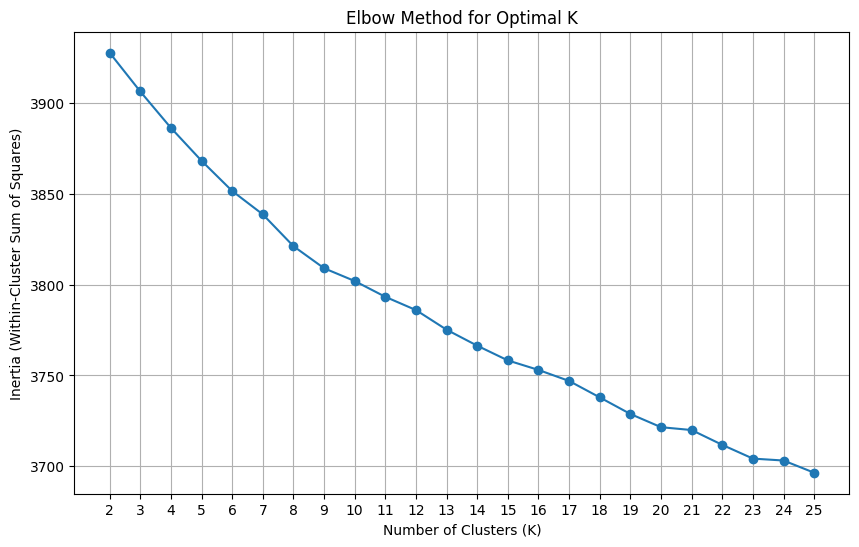


Look for the 'elbow' point in the plot above.
This is where the rate of decrease in inertia sharply slows down.
The K value at the elbow is often considered a good choice.


In [ ]:
# Cell 5.2: Elbow Method - Plotting

# Check if inertia calculation was successful
if 'inertias' in locals() and inertias is not None and \
   'k_range' in locals() and k_range is not None:

    print("\n--- Plotting Elbow Curve ---")
    plt.figure(figsize=(10, 6))

    # Filter out any None values if errors occurred during calculation
    valid_k = [k for k, i in zip(k_range, inertias) if i is not None]
    valid_inertias = [i for i in inertias if i is not None]

    if valid_k: # Proceed only if we have valid results
        plt.plot(valid_k, valid_inertias, marker='o', linestyle='-')
        plt.xlabel('Number of Clusters (K)')
        plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
        plt.title('Elbow Method for Optimal K')
        plt.xticks(valid_k) # Show ticks for tested K values (might get crowded for large ranges)
        plt.grid(True)
        plt.show()

        print("\nLook for the 'elbow' point in the plot above.")
        print("This is where the rate of decrease in inertia sharply slows down.")
        print("The K value at the elbow is often considered a good choice.")
    else:
        print("No valid inertia values found to plot.")

else:
    print("Skipping Elbow Plot because inertia calculation failed or prerequisites are missing.")

Now clustering



In [55]:
# Cell 5: Clustering (K-Means)

from sklearn.cluster import KMeans # Ensure KMeans is imported

# Check if tfidf_matrix exists from Cell 4
if 'tfidf_matrix' in locals() and tfidf_matrix is not None:

    # --- Choose the number of clusters (K) ---
    # Since we don't have ground truth labels, we choose K for exploration.
    # Let's stick with 15 as chosen before, or pick another reasonable number.
    num_clusters = 25
    # ----------------------------------------

    print(f"Applying K-Means clustering with k={num_clusters}...")

    # Initialize KMeans
    # n_init='auto' or 10 helps suppress warnings and runs multiple initializations
    # random_state ensures reproducibility
    final_kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

    try:
        # Fit K-Means to the TF-IDF data
        final_kmeans.fit(tfidf_matrix)
        cluster_labels = final_kmeans.labels_ # Get the cluster assignment for each document
        print("K-Means fitting complete.")

        # Add cluster labels to the sample DataFrame for later use
        # Ensure df_sample exists
        if 'df_sample' in locals():
             df_sample['cluster_id'] = cluster_labels
             print("Cluster IDs added to 'df_sample'.")

             # Display the distribution of data points across clusters
             print("\nDistribution of documents per cluster:")
             print(df_sample['cluster_id'].value_counts().sort_index())
        else:
             print("Warning: df_sample not found. Cannot add cluster IDs.")

    except Exception as e:
        print(f"Error during K-Means clustering: {e}")
else:
    print("Skipping K-Means because TF-IDF matrix was not created successfully in Cell 4.")

Applying K-Means clustering with k=25...
K-Means fitting complete.
Cluster IDs added to 'df_sample'.

Distribution of documents per cluster:
cluster_id
0      77
1      88
2     140
3     268
4      65
5     127
6     114
7     417
8      86
9     236
10     88
11    322
12    342
13    294
14    134
15    167
16    343
17     61
18    133
19     82
20    142
21    100
22     65
23    109
24     54
Name: count, dtype: int64


#4.Cluster Evaulationn

 Get Cluster Centroids

In [56]:
# Check if the final K-Means model exists
if 'final_kmeans' in locals() and hasattr(final_kmeans, 'cluster_centers_'):
    # Get the centroid vectors. Shape will be (n_clusters, n_features)
    centroids = final_kmeans.cluster_centers_
    print(f"Successfully retrieved cluster centroids.")
    print(f"Shape of centroids matrix: {centroids.shape}") # Should be (chosen_k, n_features)
else:
    print("Error: 'kmeans' .")
    centroids = None

Successfully retrieved cluster centroids.
Shape of centroids matrix: (25, 27692)


 Top Terms for First Cluster

In [57]:
# Examine the top terms for the first cluster (index 0)

# Check prerequisites
if centroids is not None and 'feature_names' in locals() and feature_names is not None:
    print(f"\n--- Top Terms for Cluster 0 ---")
    try:
        # Get the centroid vector for the first cluster
        centroid_0 = centroids[0]

        # Find the indices of the terms with the highest scores in this centroid
        # argsort() returns indices that *would* sort the array (ascending)
        # [::-1] reverses it to get descending order (highest scores first)
        top_term_indices = centroid_0.argsort()[::-1]

        # How many top terms to display
        n_top_terms = 15

        print(f"Top {n_top_terms} terms:")
        # Get the actual words from feature_names using the top indices
        for i in range(n_top_terms):
            term_index = top_term_indices[i]
            term = feature_names[term_index]
            score = centroid_0[term_index] # Get the actual score from the centroid
            print(f"  {term:<20} (Score: {score:.4f})")

    except Exception as e:
        print(f"An error occurred while getting top terms for Cluster 0: {e}")
else:
    print("Skipping top terms calculation as prerequisites (centroids, feature_names) are missing.")


--- Top Terms for Cluster 0 ---
Top 15 terms:
  album                (Score: 0.2167)
  band                 (Score: 0.1399)
  song                 (Score: 0.1386)
  released             (Score: 0.0788)
  music                (Score: 0.0749)
  songs                (Score: 0.0651)
  rock                 (Score: 0.0563)
  albums               (Score: 0.0453)
  single               (Score: 0.0417)
  records              (Score: 0.0389)
  recorded             (Score: 0.0387)
  chart                (Score: 0.0387)
  studio               (Score: 0.0365)
  debut                (Score: 0.0352)
  singles              (Score: 0.0349)


Count Documents in Cluster 0

In [58]:
# Find how many documents were assigned to Cluster 0

if 'df_sample' in locals() and 'cluster_id' in df_sample.columns:
    count_cluster_0 = (df_sample['cluster_id'] == 0).sum()
    print(f"\nNumber of documents assigned to Cluster 0: {count_cluster_0}")
else:
    print("Cannot count documents in Cluster 0, df_sample or 'cluster_id' missing.")


Number of documents assigned to Cluster 0: 77


Top Terms for ALL Clusters

In [59]:
# Now repeat the process to get top terms for all clusters


chosen_k=25
# Check prerequisites
if centroids is not None and 'feature_names' in locals() and feature_names is not None and 'chosen_k' in locals():
    print(f"\n--- Top Terms for All {chosen_k} Clusters ---")
    n_top_terms = 10 # Show fewer terms per cluster in the loop

    for i in range(chosen_k): # Loop through cluster indices 0 to k-1
        print(f"\nCluster {i}:")
        try:
            centroid_i = centroids[i]
            top_term_indices = centroid_i.argsort()[::-1]

            # Get the actual words from feature_names
            top_terms = [feature_names[idx] for idx in top_term_indices[:n_top_terms]]
            print(f"  Top {n_top_terms} terms: {top_terms}")

        except Exception as e:
            print(f"  Error processing cluster {i}: {e}")
else:
    print("Skipping top terms calculation for all clusters as prerequisites are missing.")


--- Top Terms for All 25 Clusters ---

Cluster 0:
  Top 10 terms: ['album', 'band', 'song', 'released', 'music', 'songs', 'rock', 'albums', 'single', 'records']

Cluster 1:
  Top 10 terms: ['sentence', 'word', 'words', 'verb', 'english', 'sentences', 'language', 'verbs', 'noun', 'example']

Cluster 2:
  Top 10 terms: ['acid', 'reaction', 'synthesis', 'chloride', 'compound', 'compounds', 'methyl', 'pyridine', 'organic', 'used']

Cluster 3:
  Top 10 terms: ['city', 'river', 'area', 'park', 'south', 'road', 'north', 'new', 'station', 'located']

Cluster 4:
  Top 10 terms: ['pattern', 'matching', 'match', 'patterns', 'student', 'triangle', 'example', 'string', 'matches', 'tutor']

Cluster 5:
  Top 10 terms: ['software', 'windows', 'video', 'file', 'user', 'command', 'microsoft', 'linux', 'os', 'version']

Cluster 6:
  Top 10 terms: ['web', 'server', 'user', 'data', 'javascript', 'client', 'browser', 'google', 'users', 'application']

Cluster 7:
  Top 10 terms: ['students', 'research', 'un

Count Documents in ALL Clusters




--- Number of documents per Cluster ---
cluster_id
0      77
1      88
2     140
3     268
4      65
5     127
6     114
7     417
8      86
9     236
10     88
11    322
12    342
13    294
14    134
15    167
16    343
17     61
18    133
19     82
20    142
21    100
22     65
23    109
24     54
Name: count, dtype: int64


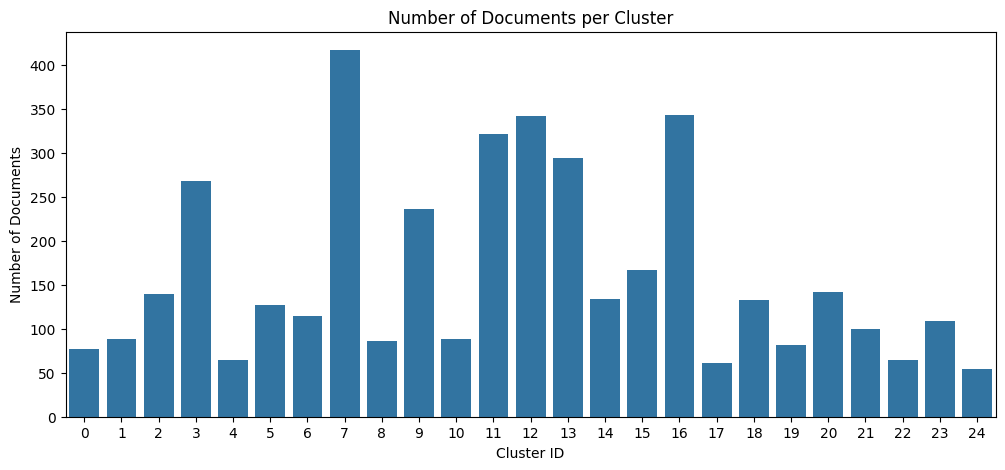

In [60]:
# Print the number of documents assigned to each cluster

if 'df_sample' in locals() and 'cluster_id' in df_sample.columns:
    print("\n--- Number of documents per Cluster ---")
    # Use value_counts() for a nice summary, sorted by cluster ID
    cluster_counts = df_sample['cluster_id'].value_counts().sort_index()
    print(cluster_counts)


    plt.figure(figsize=(12, 5))
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
    plt.title('Number of Documents per Cluster')
    plt.xlabel('Cluster ID')
    plt.ylabel('Number of Documents')
    plt.show()
else:
    print("Cannot count documents per cluster, df_sample or 'cluster_id' missing.")



1.  Cluster 0: Music (Recorded)
2. Cluster 1: Linguistics / Grammar
3. Cluster 2: Chemistry (Organic/Synthesis)
4. Cluster 3: Geography / Locations
5. Cluster 4: Pattern Matching / CS Education
6. Cluster 5: Computer Software / Operating Systems
7. Cluster 6: Web Technologies / Development
8. Cluster 7: Education / Academia / Research
9. Cluster 8: Programming (Python Focus)
10. Cluster 9: Algorithms / Machine Learning / CS Concepts
11. Cluster 10: Sports / Competitions
12. Cluster 11: Politics / Government / Warfare
13. Cluster 12: Physics / Earth Science / Environment (Physical)
14. Cluster 13: Literature / Books / Arts (Creative Works)
15. Cluster 14: Biology / Medicine / Health (Cellular/Molecular)
16. Cluster 15: Data Management / Databases / Info Systems
17. Cluster 16: History (Ancient/Classical)
18. Cluster 17: Games (Video/Card)
19. Cluster 18: Ecology / Zoology / Botany
20. Cluster 19: Religion (Christianity Focus)
21. Cluster 20: Industry / Manufacturing (Chemical/Pharma)
22. Cluster 21: Film / Television / Entertainment
23. Cluster 22: Environmental Science / Climate (Field Data)
24. Cluster 23: Law / Legal System
25. Cluster 24: Demographics / Census Data / Sociology

